In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
from tqdm import tqdm

## Audio in digital form:

<b>Frequency:</b> 
<ul>
    <li> Frequency describes the differences of the wavelengths.
    <li> We interpret frequency as high and low pitches.
</ul>


<b>Intensity: (dB/power)</b>
<ul>
    <li> Intensity describes the amplitude (height) of the wave.
</ul>


<b>Sample Rate:</b>
<ul>
    <li> Sample rate is specific to how the computer reads in the audio file.
    <li> Think of it as the "resolution" of the audio.
</ul>

### Loading, listening and viewing waveform of a sound file

I have recorded some sound clips using my phone from a piano and saved them with note names. Lets load all the sound files and try to listen files in the notebook.

In [2]:
# Bulk reading of sound clips
audio_files = glob('data/Sample piano clips/*.wav')
audio_files

['data/Sample piano clips\\A-01.wav',
 'data/Sample piano clips\\A-02.wav',
 'data/Sample piano clips\\B-01.wav',
 'data/Sample piano clips\\B-02.wav',
 'data/Sample piano clips\\C-01.wav',
 'data/Sample piano clips\\C-02.wav',
 'data/Sample piano clips\\D-01.wav',
 'data/Sample piano clips\\D-02.wav',
 'data/Sample piano clips\\E-01.wav',
 'data/Sample piano clips\\E-02.wav',
 'data/Sample piano clips\\F-01.wav',
 'data/Sample piano clips\\F-02.wav',
 'data/Sample piano clips\\G-01.wav',
 'data/Sample piano clips\\G-02.wav']

*audio_files* is now a list of soundfile location names with each index refering to a single sound file location.

Lets load and play a sound clip using the IPython library.

In [3]:
# Playing audio file
# The sound file can be changed by changing the index of the list
ipd.Audio(audio_files[0])

In [4]:
# Now lets load the sound file data using the librosa library
y,sr = librosa.load(audio_files[0])
print(f'Display the first few datapoints of the y:\n {y[:10]}\n')
print(f'Shape of y: {y.shape}\n')
print(f'Sample rate: {sr}')

Display the first few datapoints of the y:
 [-1.6502115e-04 -1.0608377e-04 -2.2045957e-04 -5.1815969e-05
  2.9095903e-04  1.1706398e-04  8.8800833e-04  1.1761636e-03
  1.0432475e-03  1.0041021e-03]

Shape of y: (87917,)

Sample rate: 22050


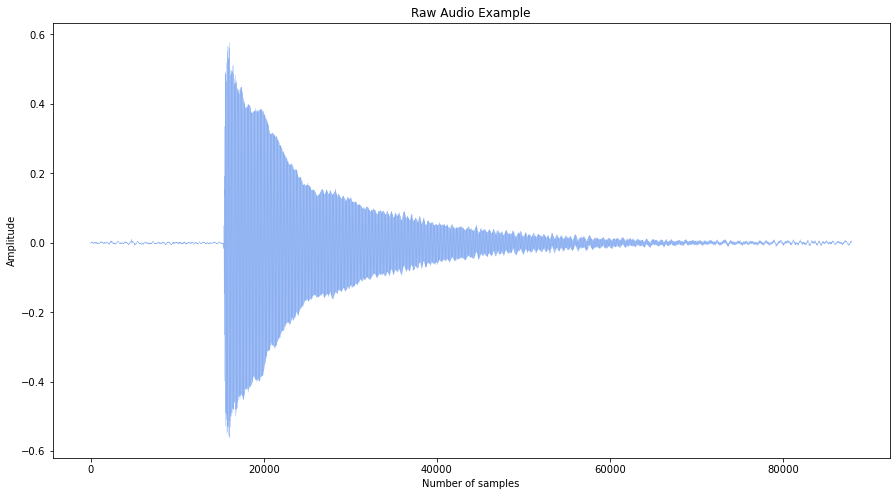

In [5]:
# ploting the waveform of the sound file
plt.figure(figsize=(15,8))
plt.plot(y, lw = 0.2, alpha = 0.75, c='cornflowerblue')
plt.title('Raw Audio Example')
plt.xlabel('Number of samples')
plt.ylabel('Amplitude')
plt.show()

---

## Audio Classification Project using Deep Learning

Since we now have a basic understanding of loading and displaying a sound file lets now work with a UrbanSound8K dataset which is a collection of labeled sound clips belonging to 10 distinct classes.

In [6]:
# Reading the dataset
audio_metadata = pd.read_csv('data/UrbanSound8K/metadata/UrbanSound8K.csv')

In [7]:
# Sanity check
audio_metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [8]:
# Checking the shape of the dataset
audio_metadata.shape

(8732, 8)

We see that there are over 8500 audio clips in the dataset having 8 features.

In [9]:
# Check whether the dataset is balanced
audio_metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

The column 'class' is the dependent column in our case. We would eventually want to identify the sound and classify it into one of these 10 classes mentioned in the dataset.

We also observe that the data is fairly evenly distributed, though the classes of 'siren', 'car_horn' & 'gun_shot' have less number of data points, with 'car_horn' and 'gun_shot' being less than half of the others. This might affect their identification.

### Feature Extraction

We will be using the Mel-Frequency Cepstral Coefficients(MFCC) from the audio files. This is a variation of an audio spectrogram which uses Mel band frequency instead of the regular frequency.

Let us first see the MFCC for the sample audio file that we have

In [10]:
ipd.Audio(audio_files[0])

In [11]:
mfcc_audiofile = librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40)

sample_mfcc_scaled = np.mean(mfcc_audiofile.T, axis = 0)

In [12]:
mfcc_audiofile.shape

(40, 172)

In [13]:
sample_mfcc_scaled.shape

(40,)

In [14]:
mfcc_audiofile

array([[-4.8839249e+02, -4.8165399e+02, -4.8135400e+02, ...,
        -4.8280801e+02, -4.8103131e+02, -4.7337509e+02],
       [ 3.5666817e+01,  4.4389709e+01,  4.4997795e+01, ...,
         4.2935226e+01,  4.5742180e+01,  5.4523277e+01],
       [ 3.0801044e+01,  3.7492321e+01,  3.8523056e+01, ...,
         3.6457306e+01,  3.9880726e+01,  4.3709568e+01],
       ...,
       [ 4.2856417e+00,  6.1282978e+00,  5.7461896e+00, ...,
        -3.2890363e+00,  8.6310387e-02,  1.6182735e+00],
       [ 3.8188181e+00,  6.0258536e+00,  5.5266476e+00, ...,
        -4.1384377e+00, -1.1365324e+00,  1.2143873e+00],
       [ 2.5595479e+00,  4.5743837e+00,  4.9069967e+00, ...,
        -3.1997061e+00, -1.6262910e+00,  1.2933359e+00]], dtype=float32)

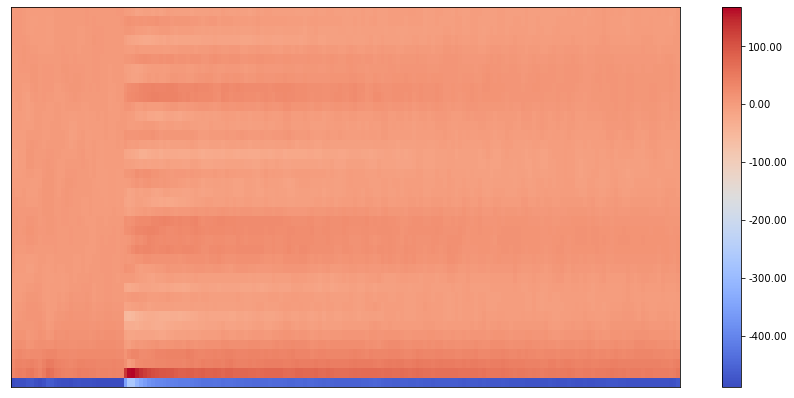

In [15]:
plt.figure(figsize=(15,7))
librosa.display.specshow(mfcc_audiofile, sr = sr)
plt.colorbar(format = "%.2f")
plt.show()

In [16]:
audio_dataset_path = "data/UrbanSound8K/audio/"

In [17]:
audio_metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [18]:
def feature_extractor(file):
    audio, sr = librosa.load(file, res_type = "kaiser_fast")
    mfcc_features = librosa.feature.mfcc(y = audio, 
                                      sr = sr,
                                      n_mfcc = 40)
    mfcc_scaled_features = np.mean(mfcc_features.T, axis = 0)
    
    return mfcc_scaled_features

In [19]:
extracted_features = []

for i,row in tqdm(audio_metadata.iterrows()):
    filename = os.path.join(audio_dataset_path, 'fold' + str(row['fold']) + '/', str(audio_metadata['slice_file_name'][i]))
    data = feature_extractor(filename)
    class_label = row['class']
    extracted_features.append([data, class_label])

3554it [03:51, 14.97it/s]C:\Users\prana\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8326it [08:45, 26.45it/s]C:\Users\prana\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\prana\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [09:09, 15.88it/s]


In [20]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['features','class'])
extracted_features_df.head()

,features,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [21]:
extracted_features_df.shape

(8732, 2)

In [22]:
# Split the dataset in independent and dependent datasets
X = np.array(extracted_features_df['features'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [23]:
X.shape

(8732, 40)

In [24]:
y.shape

(8732,)

In [25]:
# Label Encoding - improper way (just class numbers)
# y = np.array(pd.get_dummies(y))

# Label Encoding - proper way
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [26]:
y.shape

(8732, 10)

In [27]:
# Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
print(f"X_train has shape: {X_train.shape}")
print(f"y_train has shape: {y_train.shape}")
print(f"X_test has shape: {X_test.shape}")
print(f"y_test has shape: {y_test.shape}")

X_train has shape: (6985, 40)
y_train has shape: (6985, 10)
X_test has shape: (1747, 40)
y_test has shape: (1747, 10)


### Model Creation

In [29]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [31]:
# number of classification classes
num_labels = y.shape[1]

In [32]:
model = Sequential()

# First Layer
model.add(Dense(100, input_shape = (40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Second Layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Third Layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [34]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [35]:
# Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'saved_models/audio_classification.hdf5', verbose = 1, save_best_only = True)
start = datetime.now()

model.fit(X_train, y_train, 
          batch_size = num_batch_size, 
          epochs = num_epochs, 
          validation_data = (X_test, y_test), 
          callbacks = [checkpointer], 
          verbose = 1)

duration = datetime.now() - start
print(f"Training completed in time: {duration}")

Epoch 1/100
218/219 [============================>.] - ETA: 0s - loss: 9.4604 - accuracy: 0.1190
Epoch 1: val_loss improved from inf to 2.28934, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 4s 9ms/step - loss: 9.4521 - accuracy: 0.1188 - val_loss: 2.2893 - val_accuracy: 0.1128
Epoch 2/100
216/219 [============================>.] - ETA: 0s - loss: 2.4780 - accuracy: 0.1254
Epoch 2: val_loss improved from 2.28934 to 2.27674, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 2.4772 - accuracy: 0.1251 - val_loss: 2.2767 - val_accuracy: 0.1173
Epoch 3/100
217/219 [============================>.] - ETA: 0s - loss: 2.3198 - accuracy: 0.1273
Epoch 3: val_loss improved from 2.27674 to 2.25095, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 2.3195 - accuracy: 0.1278 - val_loss: 2.2509 - val_accuracy: 0.1202

219/219 [==============================] - 1s 6ms/step - loss: 1.4393 - accuracy: 0.5098 - val_loss: 1.2336 - val_accuracy: 0.5970
Epoch 26/100
219/219 [==============================] - ETA: 0s - loss: 1.4311 - accuracy: 0.5071
Epoch 26: val_loss improved from 1.23359 to 1.21494, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 7ms/step - loss: 1.4311 - accuracy: 0.5071 - val_loss: 1.2149 - val_accuracy: 0.6119
Epoch 27/100
216/219 [============================>.] - ETA: 0s - loss: 1.3983 - accuracy: 0.5166
Epoch 27: val_loss improved from 1.21494 to 1.16622, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 8ms/step - loss: 1.3989 - accuracy: 0.5158 - val_loss: 1.1662 - val_accuracy: 0.6199
Epoch 28/100
218/219 [============================>.] - ETA: 0s - loss: 1.3923 - accuracy: 0.5195
Epoch 28: val_loss did not improve from 1.16622
219/219 [==============================] - 2s 8ms

214/219 [============================>.] - ETA: 0s - loss: 1.1291 - accuracy: 0.6247
Epoch 52: val_loss did not improve from 0.92449
219/219 [==============================] - 1s 6ms/step - loss: 1.1281 - accuracy: 0.6248 - val_loss: 0.9510 - val_accuracy: 0.6943
Epoch 53/100
209/219 [===========================>..] - ETA: 0s - loss: 1.0943 - accuracy: 0.6305
Epoch 53: val_loss improved from 0.92449 to 0.92219, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 1.0951 - accuracy: 0.6304 - val_loss: 0.9222 - val_accuracy: 0.7092
Epoch 54/100
217/219 [============================>.] - ETA: 0s - loss: 1.0945 - accuracy: 0.6336
Epoch 54: val_loss improved from 0.92219 to 0.91939, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 1.0927 - accuracy: 0.6344 - val_loss: 0.9194 - val_accuracy: 0.7127
Epoch 55/100
209/219 [===========================>..] - ETA: 0

219/219 [==============================] - ETA: 0s - loss: 0.9989 - accuracy: 0.6649
Epoch 80: val_loss improved from 0.81030 to 0.79186, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 0.9989 - accuracy: 0.6649 - val_loss: 0.7919 - val_accuracy: 0.7504
Epoch 81/100
216/219 [============================>.] - ETA: 0s - loss: 0.9921 - accuracy: 0.6745
Epoch 81: val_loss did not improve from 0.79186
219/219 [==============================] - 1s 6ms/step - loss: 0.9940 - accuracy: 0.6742 - val_loss: 0.7967 - val_accuracy: 0.7567
Epoch 82/100
212/219 [============================>.] - ETA: 0s - loss: 1.0126 - accuracy: 0.6658
Epoch 82: val_loss did not improve from 0.79186
219/219 [==============================] - 1s 6ms/step - loss: 1.0141 - accuracy: 0.6656 - val_loss: 0.7946 - val_accuracy: 0.7516
Epoch 83/100
219/219 [==============================] - ETA: 0s - loss: 0.9773 - accuracy: 0.6812
Epoch 83: val_loss did n

In [36]:
test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(test_accuracy[1])

0.7676016092300415


### Testing some audio data

In [39]:
filename = "data/dog_bark.wav"

# Audio
ipd.Audio(filename)

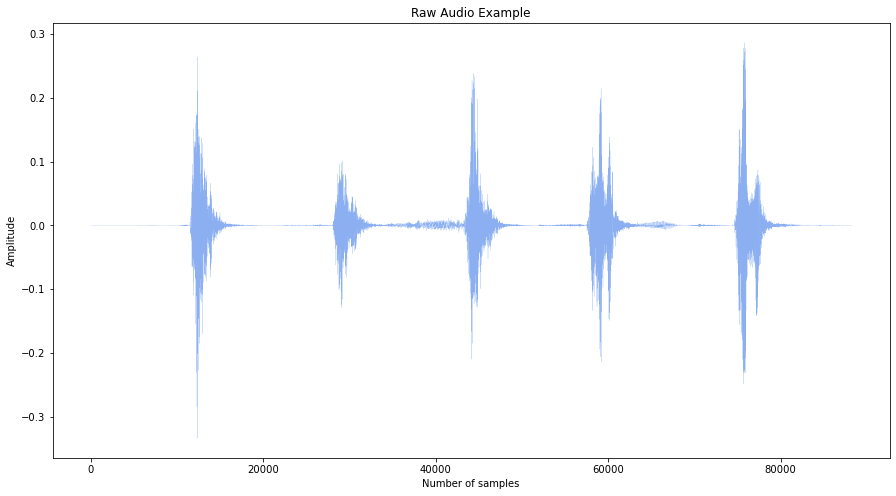

1/1 [==============================] - 0s 50ms/step
The class prediction for the data/dog_bark.wav sound is : [3]
The sound belongs to ['dog_bark'] class.


In [40]:
# ploting the waveform of the sound file
plt.figure(figsize=(15,8))
y, sr = librosa.load(filename)
plt.plot(y, lw = 0.2, alpha = 0.75, c='cornflowerblue')
plt.title('Raw Audio Example')
plt.xlabel('Number of samples')
plt.ylabel('Amplitude')
plt.show()

# Feature extraction and prediction
prediction_feature = feature_extractor(filename)
prediction_feature = prediction_feature.reshape(1, -1)
class_predict = model.predict(prediction_feature)
class_prediction = np.argmax(class_predict, axis = 1)
print(f"The class prediction for the {filename} sound is : {class_prediction}")
class_label = label_encoder.inverse_transform(class_prediction)
print(f"The sound belongs to {class_label} class.")